## Test 2

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [3]:
# Change the data type of column 'A' from float64 to float32
df['amount'] = df['amount'].astype('float32')
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype('float32')
df['oldbalanceDest'] = df['oldbalanceDest'].astype('float32')
df['newbalanceOrig'] = df['newbalanceOrig'].astype('float32')
df['newbalanceDest'] = df['newbalanceDest'].astype('float32')

In [4]:
df['step'] = df['step'].astype('int32')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('int32') 
df['isFraud'] = df['isFraud'].astype('int32') 

In [5]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['type'])
# printing label
label
# removing the column 'type' from df
# as it is of no use now.
df.drop("type", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'type'
df["type"] = label
# printing Dataframe
#df

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label
#df

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label
#df

## Split

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=18)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.99872
1    0.00128
Name: isFraud, dtype: float64
0    0.998719
1    0.001281
Name: isFraud, dtype: float64
0    0.998725
1    0.001275
Name: isFraud, dtype: float64


In [9]:
# Change the data type of column 'A' from float64 to float32
X_train['amount'] = X_train['amount'].astype('float32')
X_train['oldbalanceOrg'] =X_train['oldbalanceOrg'].astype('float32')
X_train['oldbalanceDest'] = X_train['oldbalanceDest'].astype('float32')
X_train['newbalanceOrig'] = X_train['newbalanceOrig'].astype('float32')
X_train['newbalanceDest'] = X_train['newbalanceDest'].astype('float32')

In [10]:
X_train['step'] = X_train['step'].astype('int32')
X_train['isFlaggedFraud'] = X_train['isFlaggedFraud'].astype('int32') 

## Class imbalance

In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Set up the resampling methods
smote = SMOTE(sampling_strategy=0.2, random_state=42)
rus = RandomUnderSampler(sampling_strategy=0.7, random_state=42)

# Apply the resampling methods
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [12]:
import numpy as np

# assuming y_train is a numpy array or a pandas series
counts = np.bincount(y_resampled)
print("Class 0 count:", counts[0])
print("Class 1 count:", counts[1])

Class 0 count: 205450
Class 1 count: 143815


In [13]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours,OneSidedSelection

# Assume X_train and y_train are the original training data
# resample using TomekLinks first
tomek_links = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_resampled, y_resampled)

In [14]:
import numpy as np

# assuming y_train is a numpy array or a pandas series
counts = np.bincount(y_train_resampled)
print("Class 0 count:", counts[0])
print("Class 1 count:", counts[1])

Class 0 count: 205444
Class 1 count: 143815


In [15]:
# resample the output of TomekLinks using EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_resampled_new, y_train_resampled_new = enn.fit_resample(X_train_resampled, y_train_resampled)

In [16]:
import numpy as np

# assuming y_train is a numpy array or a pandas series
counts = np.bincount(y_train_resampled_new)
print("Class 0 count:", counts[0])
print("Class 1 count:", counts[1])

Class 0 count: 202959
Class 1 count: 143815


In [17]:
from imblearn.under_sampling import OneSidedSelection
# resample the output of EditedNearestNeighbours using One-Sided Selection
oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled_final, y_train_resampled_final = oss.fit_resample(X_train_resampled_new, y_train_resampled_new)

In [18]:
import numpy as np

counts = np.bincount(y_train_resampled_final)
print("Class 0 count:", counts[0])
print("Class 1 count:", counts[1])

Class 0 count: 184149
Class 1 count: 143815


In [19]:
import numpy as np

# assuming y_train is a numpy array or a pandas series
counts = np.bincount(y_test)
print("Class 0 count:", counts[0])
print("Class 1 count:", counts[1])

Class 0 count: 79898
Class 1 count: 102


## Outliers

In [20]:
import random
import numpy as np
from scipy import stats

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the right trimming proportions for each column
trim_props = {'amount': 0.14, 'oldbalanceOrg': 0.24, 'newbalanceOrig': 0.21, 'oldbalanceDest': 0.2, 'newbalanceDest': 0.22}

# Initialize empty dictionaries to store the trimmed means for each column
train_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the training set
    train_bootstrapped_samples = []
    train_trimmed_means_list = []
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train_resampled_final.index, size=len(X_train_resampled_final), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        train_sample = X_train_resampled_final.loc[train_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the training set
        train_bootstrapped_samples.append(train_sample)
        
        # Calculate the right trimmed mean of the bootstrapped sample for the training set
        train_right_trimmed_mean = np.mean(train_sample[train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name]))])
        train_trimmed_means_list.append(train_right_trimmed_mean)
        
    # Calculate the mean of the right trimmed means for the training set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)

    # Replace the outliers in the training set with the trimmed means
    X_train_resampled_final.loc[X_train_resampled_final[col_name] > np.percentile(X_train_resampled_final[col_name], 100*(1-trim_props[col_name])), col_name] = train_trimmed_means[col_name]

# Print the trimmed means for each column separately for the training set
print("Train set trimmed means: ", train_trimmed_means)

Train set trimmed means:  {'amount': 204900.94, 'oldbalanceOrg': 119881.68, 'newbalanceOrig': 1013.3039, 'oldbalanceDest': 123873.68, 'newbalanceDest': 243024.42}


## Linearly separable

In [21]:
import numpy as np
from sklearn.linear_model import Perceptron

# Create a Perceptron object
clf = Perceptron(random_state=0)

# Train the Perceptron on the data
clf.fit(X_train_resampled_final, y_train_resampled_final)

# Predict the output classes for the data points
y_pred = clf.predict(X_train_resampled_final)

# Check if the Perceptron correctly classified all the data points
if np.all(y_pred == y_train_resampled_final):
    print("Data is linearly separable")
else:
    print("Data is not linearly separable")

Data is not linearly separable


In [22]:
# Assuming your original training data is stored in a pandas DataFrame called X_train
# And assuming you have a list of selected feature names called selected_features
selected_features = ['oldbalanceOrg', 'newbalanceOrig', 'type', 'amount']
X_train_selected = X_train_resampled_final[selected_features]

In [23]:
X_test_selected=X_test[selected_features]

## Create kernel

In [24]:
import GPy
from IPython.display import display

we use kerne function to create covariance matrix

In [25]:
#Create a 1-D kernel with default parameters
k=GPy.kern.RBF(1)
#Preview of parameters
k

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,1.0,+ve,


## Visualize kernel

In [26]:
x=np.linspace(-4.,4.,100)[:,None] # we need none to reshape x into a column vector to use in Gaussian

#first, sample kernel at x(dash)=0
K=k.K(x,np.array([[0.]])) # k(x,0)

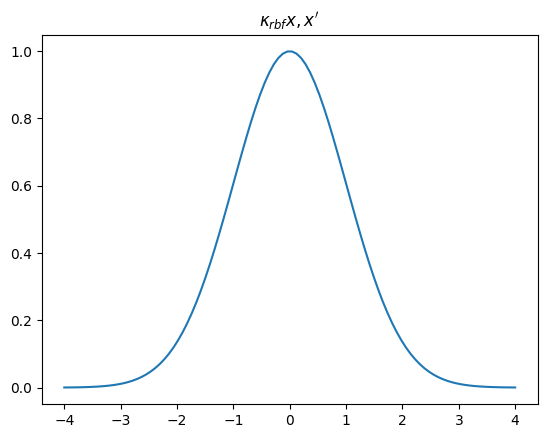

In [27]:
import matplotlib.pyplot as plt
plt.plot(x,K)
plt.title("$\kappa_{rbf}{x,x'}$");

## Lengthscale

In [28]:
fig, ax = plt.subplots()
from matplotlib.animation import FuncAnimation
from matplotlib import rc
ls = [0.05, 0.25, 0.5, 1., 2., 4]

def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k. lengthscale = ls[iteration]
    # Calculate the new covariance function at k(x,0)
    C = k.K(x, np.array([[0.]]))
    # Plot the resulting covariance vector
    ax.plot(x,C)
    ax.set_title(f"$\kappa_{{rbf}}(x,x')$ Length scale = {k.lengthscale[0]}")
    ax.set_ylim((0, 1.2))

num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

## Variance

In [29]:
fig, ax = plt.subplots()
from matplotlib.animation import FuncAnimation
from matplotlib import rc
variances = [0.05, 0.25, 0.5, 1., 2., 4]

def update(iteration):
    ax.cla()
    k = GPy.kern.RBF(1)
    k. variance = variances[iteration]
    # Calculate the new covariance function at k(x,0)
    C = k.K(x, np.array([[0.]]))
    # Plot the resulting covariance vector
    ax.plot(x,C)
    ax.set_title(f"$\kappa_{{rbf}}(x,x')$ Variance = {k.variance[0]}")
    ax.set_ylim((0, 1.2))

num_iterations = len(ls)
anim = FuncAnimation(fig, update, frames=np.arange(0, num_iterations-1, 1), interval=500)
plt.close()

rc('animation', html='jshtml')
anim

## Kernel function

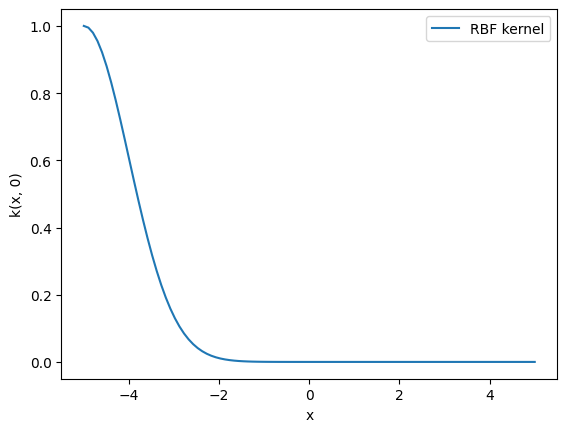

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF

# Define the RBF kernel with gamma=1.0
kernel = 1.0 * RBF(length_scale=1.0)

# Create a grid of points to evaluate the kernel function
x = np.linspace(-5, 5, 100)
X = np.atleast_2d(x).T

# Compute the kernel matrix
K = kernel(X)

# Plot the kernel function
plt.figure()
plt.plot(x, K[0], label='RBF kernel')
plt.xlabel('x')
plt.ylabel('k(x, 0)')
plt.legend(loc='best')
plt.show()

## Hyperparameter tuning for Gaussian distribution

## Train Gaussian Process Model

In [42]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.datasets import load_iris

# Define the Gaussian process classifier and set hyperparameters
gp = GaussianProcessClassifier(kernel=None, n_restarts_optimizer=10, random_state=42)

# Define the cross-validation method
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kfold.split(X, y)):
    # Split the data into training and testing sets
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]

    # Train the Gaussian process classifier
    gp.fit(X_train, y_train)

    # Evaluate the performance of the model on the testing data
    y_pred = gp.predict(X_test)
    y_prob = gp.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    print(f"Fold {fold}:")
    print(f"Classification report:\n{report}")
    print(f"AUC: {auc:.3f}\n")

ValueError: Found input variables with inconsistent numbers of samples: [100, 800000]